# **Machine Learning Week 8 - PCA**
---
> Introduction to Machine Learning <br>
> Sekolah Data, Pacmann

---
# Siapkan Data

**Iris Dataset**

- Terdiri dari 3 spesies, 150 data bunga Iris. `iris-setosa`, `iris-versicolor`, `iris-virginica`.
- Terdiri dari 4 fitur: `sepal length`, `sepal width`, `petal length`, `petal width`.

![](https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
from sklearn import datasets
iris_data = datasets.load_iris()

# Convert data jadi dataframe
iris_df = pd.DataFrame(data = iris_data.data,
                       columns = iris_data.feature_names)
iris_df["target"] = iris_data.target

# Convert target 0, 1, 2 jadi setosa, versicolor, virginica
iris_df["target"] = iris_df["target"].map({0: "setosa",
                                           1: "versicolor",
                                           2: "virginica"})

# Tampilkan data
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Tampilkan shape data
nrows, ncols = iris_df.shape

print(f"ukuran data: ({nrows}, {ncols}), (#data, #fitur)")

ukuran data: (150, 5), (#data, #fitur)


In [4]:
# Tampilkan target
iris_df["target"].value_counts(normalize = True)

target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

- Data memiliki 4 fitur
- Data berisi 150 observasi (sampel)
- Target ada 3 kategori, ukuran data balance

---
# Eksplorasi Data

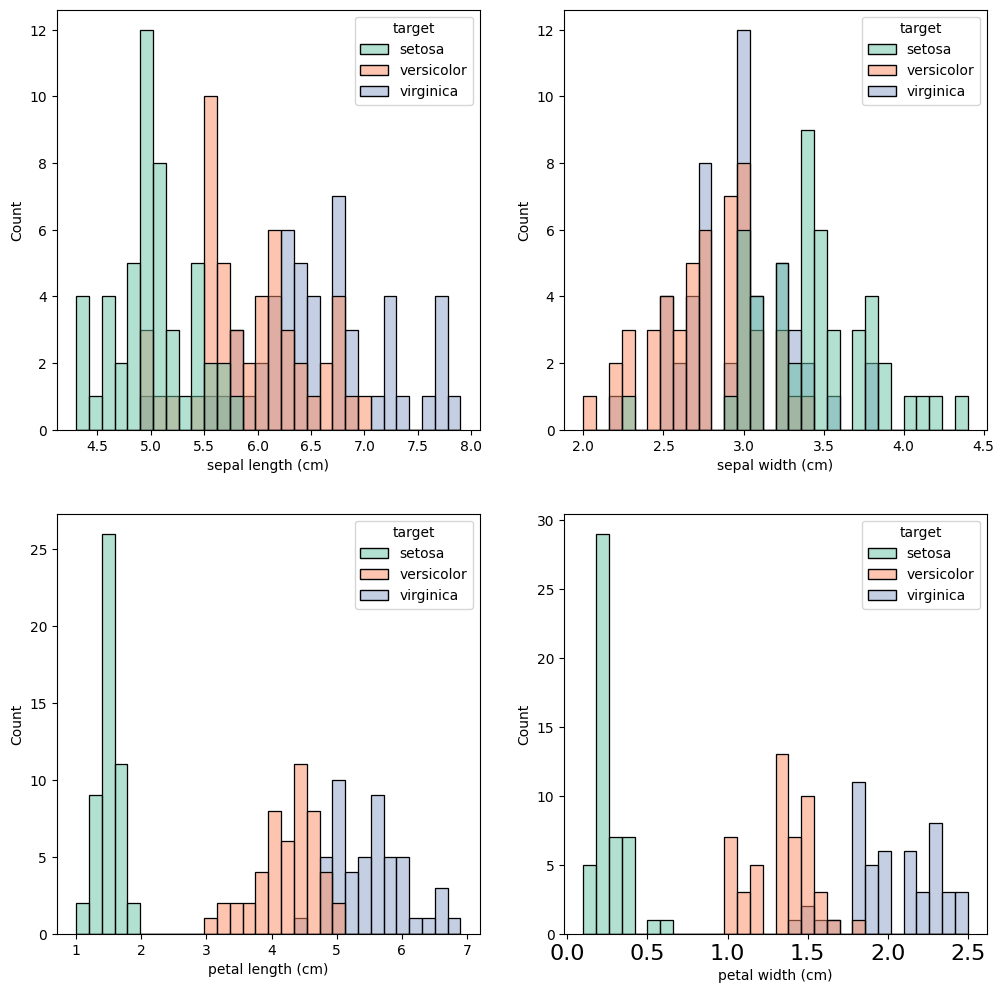

In [5]:
# Kita tunjukkan distribusi antar fitur
# untuk bisa melakukan klasifikasi target
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

# Distribusi Panjang Sepal
iris_df_col = list(iris_df.columns)
for i in range(4):
    # Cari kolom
    col = iris_df_col[i]

    # Cari ax_row & ax_col
    ax_row = i // 2
    ax_col = i % 2

    # Plot histogram kolom
    sns.histplot(x = col, data = iris_df,
                 hue = "target", bins = 30,
                 palette = "Set2", alpha = 0.5,
                 ax = ax[ax_row, ax_col])

plt.xticks(fontsize = 16)
plt.show()

Key takeaways:
- Pada fitur sepal length & sepal width, data antar kategori target bercampur --> sulit untuk diklasifikasikan.
- Pada fitur lain, data lumayan terpisah, sehingga mudah untuk diklasifikasikan.
- **Opsi**:
    - Drop fitur sepal length & sepal width
    - Namun, kita akan kehilangan informasi
- **Solusi**:
    - Transformasi fitur menggunakan PCA

---
# Algoritma PCA

1. Standardisasi data
2. Cari covariance matrix
3. Lakukan eigen analysis
4. Transformasi data baru

**0. Split Input Output**

In [6]:
# Split input output
def splitInputOutput(data, target_col):
    X = data.drop(columns = target_col)
    y = data[target_col]

    return X, y

In [7]:
X, y = splitInputOutput(data = iris_df,
                        target_col = "target")

In [8]:
X.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    setosa
 1    setosa
 2    setosa
 3    setosa
 4    setosa
 Name: target, dtype: object)

**1. Standardisasi data**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
# Buat scaler
scaler = StandardScaler()

In [11]:
# Fit scaler
scaler.fit(X)

StandardScaler()

In [12]:
# Transform data
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(data = X_scaled,
                        index = X.index,
                        columns = X.columns)

X_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**2. Cari Covariance Matrix**

- Covariance matrix akan berukuran 4 x 4

In [13]:
cov_mat = np.cov(X_scaled, rowvar = False)
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**3. Lakukan Eigen Decomposition**

- Menggunakan `np.linalg.eig(...)`

In [14]:
eigen_val, eigen_vec = np.linalg.eig(cov_mat)

- Eigen Vector (Principal Component)

In [15]:
# Eigen_vec adalah principal component kita
eigen_vec

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [16]:
# Atau bentuk lainnya
eigen_vec_df = pd.DataFrame(data = eigen_vec,
                            columns = [f"PC-{i+1}" for i in range(X.shape[1])],
                            index = X.columns)

eigen_vec_df

,PC-1,PC-2,PC-3,PC-4
sepal length (cm),0.521066,-0.377418,-0.719566,0.261286
sepal width (cm),-0.269347,-0.923296,0.244382,-0.123510
petal length (cm),0.580413,-0.024492,0.142126,-0.801449
petal width (cm),0.564857,-0.066942,0.634273,0.523597


In [17]:
# Principal component adalah kolom dari eigen vector.
# Misal principal component 1 adalah
PC_1 = eigen_vec[:, 0]
PC_1

array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])

In [18]:
# Principal component 2 adalah
PC_2 = eigen_vec[:, 1]
PC_2

array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])

- Eigen Value (Variance data di setiap principal Components)

In [19]:
eigen_val

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

- PC_1 memiliki variance 2.93
- PC_2 memiliki variance 0.92
- PC_3 memiliki variance 0.15
- PC_4 memiliki variance 0.02

**4. Transformasi Data berdasarkan Principal Component yang dipilih**

- Gunakan dot product antara data dengan principal component untuk melakukan proyeksi (transformasi)

In [20]:
X_transformed = np.dot(X_scaled, eigen_vec)
X_transformed = pd.DataFrame(data = X_transformed,
                             index = X_scaled.index,
                             columns = [f"PC-{i+1}" for i in range(X.shape[1])])
X_transformed.head()

,PC-1,PC-2,PC-3,PC-4
0,-2.264703,-0.480027,-0.127706,0.024168
1,-2.080961,0.674134,-0.234609,0.103007
2,-2.364229,0.341908,0.044201,0.028377
3,-2.299384,0.597395,0.091290,-0.065956
4,-2.389842,-0.646835,0.015738,-0.035923


**5. Reduksi Dimensi**

- Pilih `n` Principal Component untuk mempertahankan `p`% variance

In [21]:
# Cari %variance yang dijelaskan dari jumlah kumulatif principal component
for i in range(X.shape[1]):
    percent_var = np.sum(eigen_val[:i+1]) / np.sum(eigen_val) * 100
    print(f"Saat menggunakan {i+1} PC, %var: {percent_var:.2f}%")

Saat menggunakan 1 PC, %var: 72.96%
Saat menggunakan 2 PC, %var: 95.81%
Saat menggunakan 3 PC, %var: 99.48%
Saat menggunakan 4 PC, %var: 100.00%


- Apabila kita menjaga 95% variance, maka kita akan memilih 2 principal components

In [22]:
n_pc = 2

# Ambil principal components
principal_components = eigen_vec[:, :n_pc]
principal_components

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [23]:
# Transformasi data
X_transformed = np.dot(X_scaled, principal_components)
X_transformed = pd.DataFrame(data = X_transformed,
                             columns = [f"PC-{i+1}" for i in range(n_pc)],
                             index = X.index)

X_transformed

,PC-1,PC-2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835
...,...,...
145,1.870503,-0.386966
146,1.564580,0.896687
147,1.521170,-0.269069
148,1.372788,-1.011254


In [24]:
data_transformed = pd.concat([X_transformed, y], 
                             axis=1)
data_transformed.head()

,PC-1,PC-2,target
0,-2.264703,-0.480027,setosa
1,-2.080961,0.674134,setosa
2,-2.364229,0.341908,setosa
3,-2.299384,0.597395,setosa
4,-2.389842,-0.646835,setosa


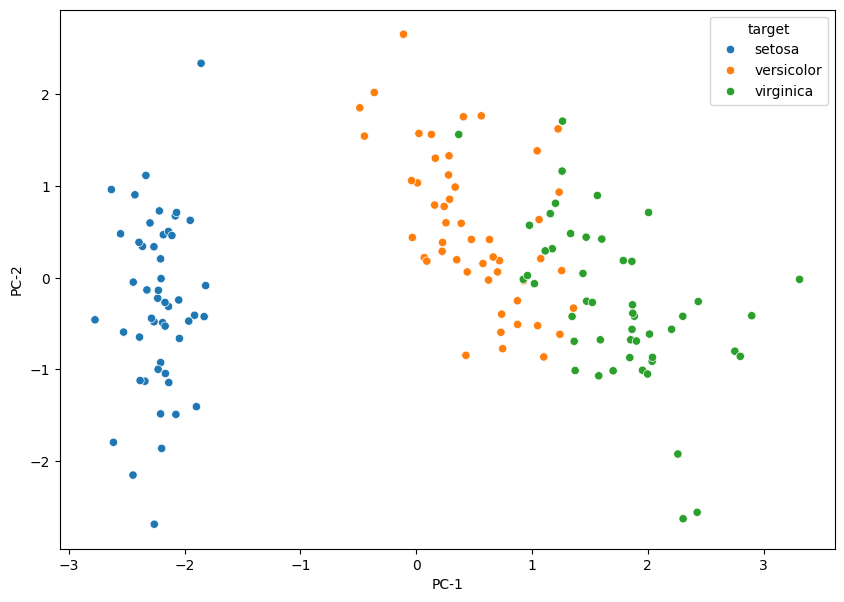

In [25]:
# Visualkan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

sns.scatterplot(data = data_transformed,
                x = "PC-1",
                y = "PC-2",
                hue = "target",
                ax = ax)

plt.show()

---
# Menggunakan SKLEARN

In [26]:
from sklearn.decomposition import PCA

- Buat objek & fit

In [27]:
# Buat objek
pca_object = PCA(n_components = 2)

# Fit objek
pca_object.fit(X_scaled)

PCA(n_components=2)

- Ekstrak Principal Component & Variance

In [28]:
# Ekstrak principal components
pca_object.components_

# Baris 1 --> PC 1
# Baris 2 --> PC 2

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [29]:
# Ekstrak variance yang dijelaskan
pca_object.explained_variance_ratio_

array([0.72962445, 0.22850762])

- Transform data

In [30]:
X_transformed_pca = pca_object.transform(X_scaled)
X_transformed_pca = pd.DataFrame(data = X_transformed_pca,
                                 columns = [f"PC-{i+1}" for i in range(2)],
                                 index = X.index)

X_transformed_pca.head()

,PC-1,PC-2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


- Visualkan Hasil

In [31]:
data_transformed_pca = pd.concat([X_transformed_pca, y], 
                                  axis=1)
data_transformed_pca.head()

,PC-1,PC-2,target
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


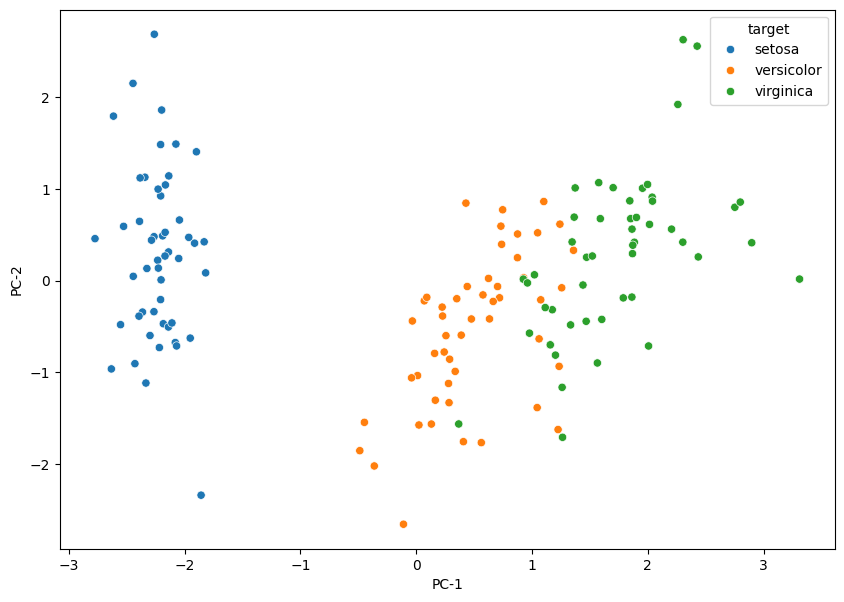

In [32]:
# Visualkan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,7))

sns.scatterplot(data = data_transformed_pca,
                x = "PC-1",
                y = "PC-2",
                hue = "target",
                ax = ax)

plt.show()